In [1]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def parse_table():
    with open("/usr/src/app/model-data/results.json", "r") as f:
        table = json.load(f)
    [model_name, feature_name, precision, recall, f1, time] = [
        [lst[idx] for lst in table.values()]
        for idx in xrange(6)
    ]
    return pd.DataFrame({
        "model_name": model_name,
        "feature_name": feature_name,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "time": time
    })

results = parse_table()

In [3]:
def draw_plot(data):
    plt.figure(figsize=(10,10))
    plt.scatter(data["precision"], data["recall"], c=data["f1"])
    for label, f1, x, y in zip(data["feature_name"], data["f1"], data["precision"], data["recall"]):
        plt.annotate(
            "%s (%0.2f)" % (label, f1), 
            xy = (x, y), xytext = (10, 10),
            textcoords = 'offset points', ha = 'left', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    axes = plt.gca()
    axes.set_xlim([0,1])
    axes.set_ylim([0,1])
    plt.show()

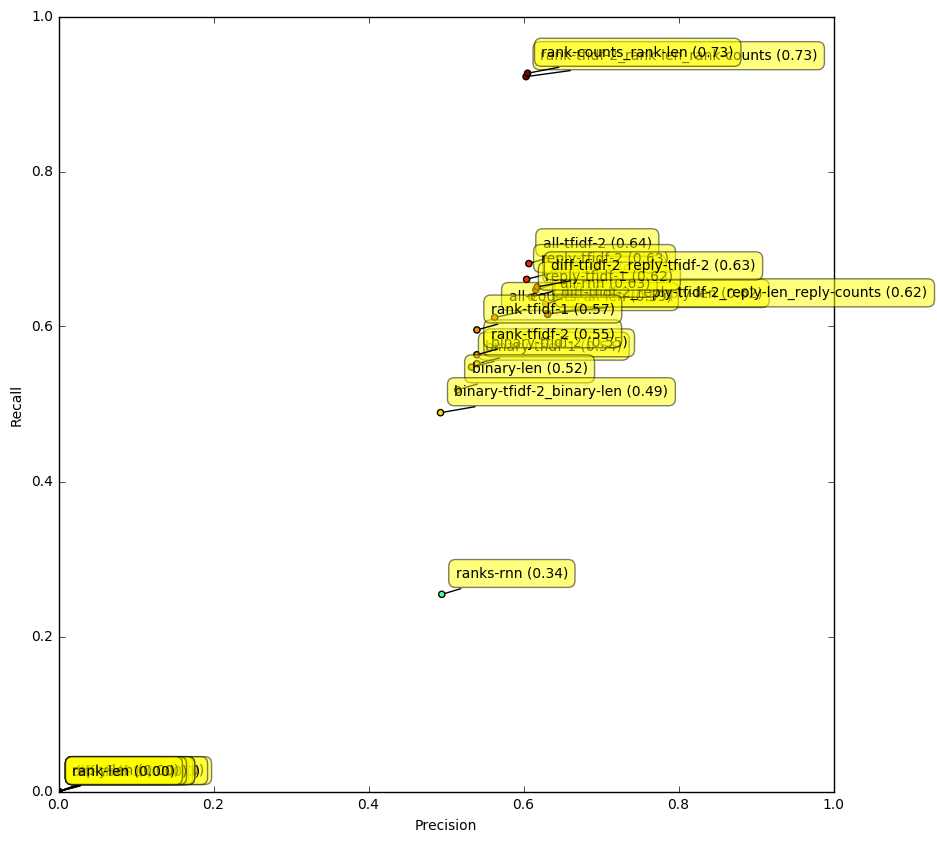

In [4]:
draw_plot(results[results["model_name"] == "MultinomialNB"])

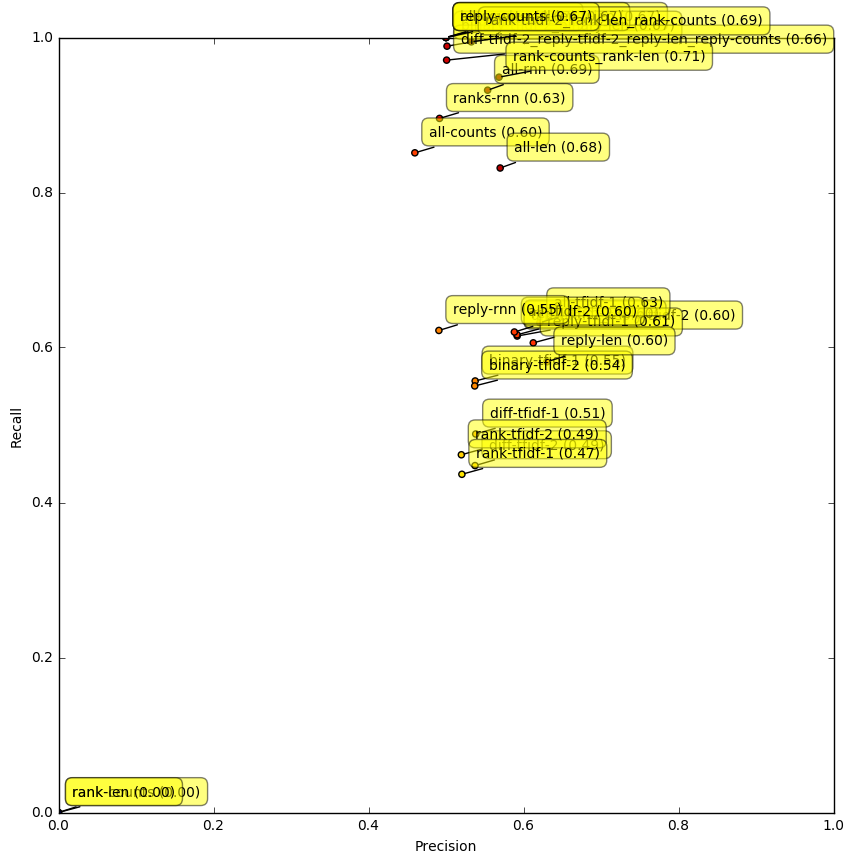

In [5]:
draw_plot(results[results["model_name"] == "LinearSVC"])

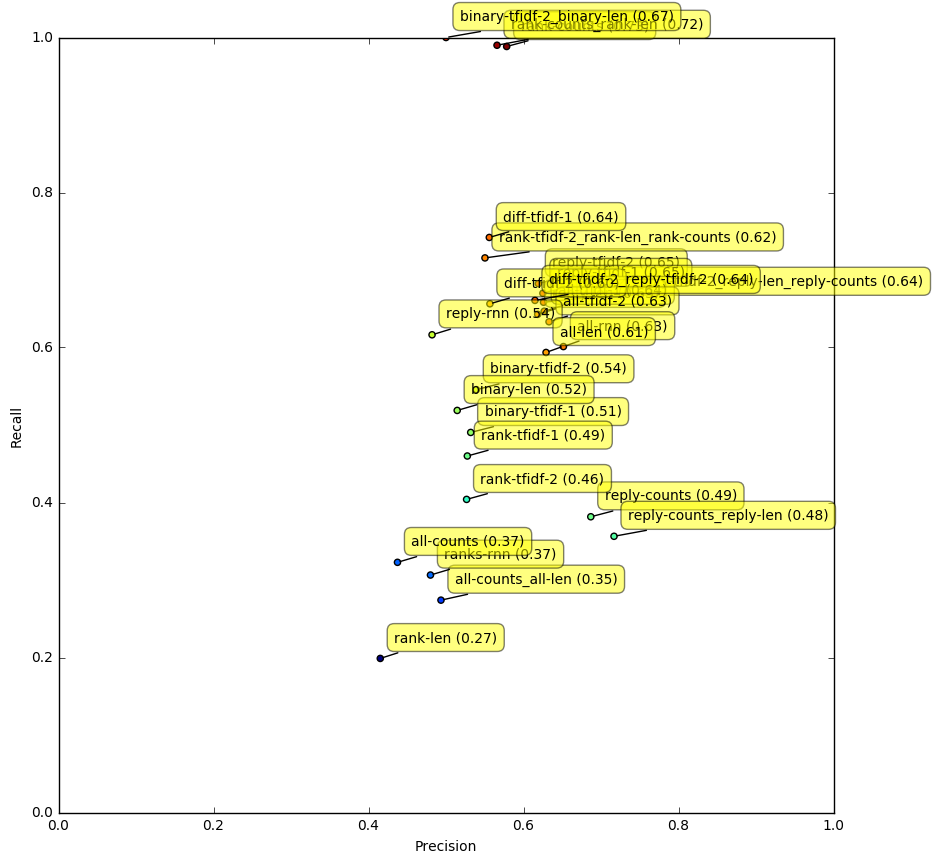

In [6]:
draw_plot(results[results["model_name"] == "MLP"])

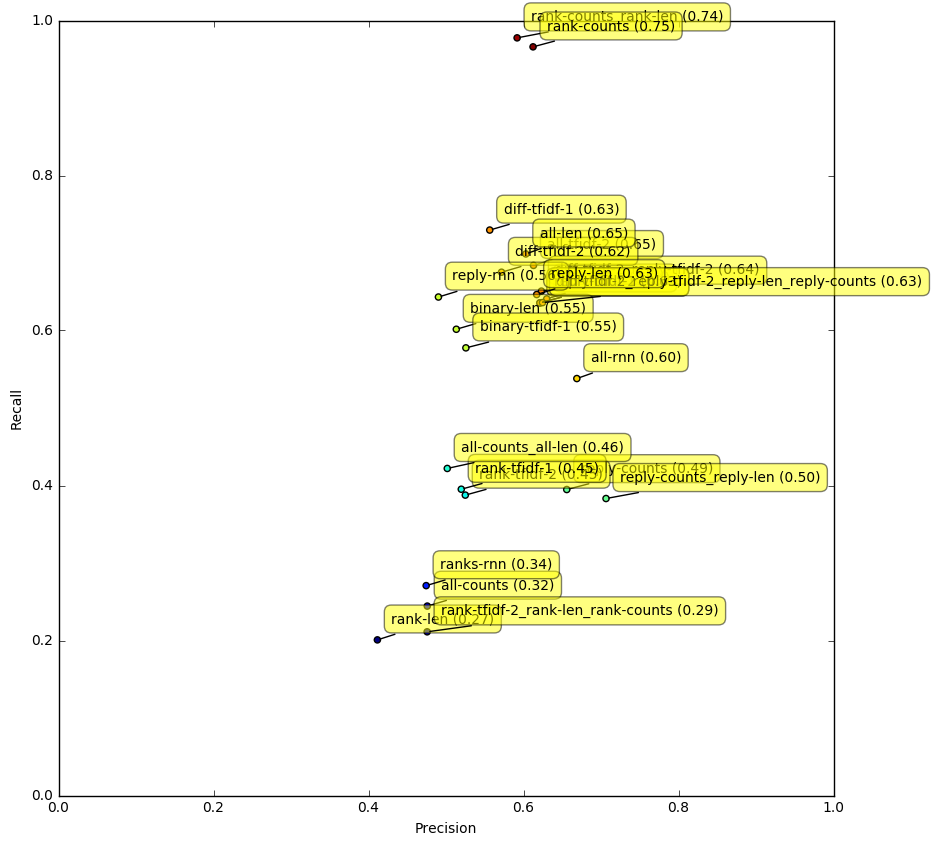

In [7]:
draw_plot(results[results["model_name"] == "MLP2"])